# EDA y ETL
## Datos sobre las transacciones bancarias en Trabanca 2020-2021
### librerías necesarias para esta fase del proyecto

In [69]:
 #Librerías para la importación y manipulación de los datos.
import pandas as pd
import numpy as np

 #Librerias para la visualización.
import matplotlib.pyplot as plt
import seaborn as sns

### Se importan los datos necesarios, e inmediatamente se busca observar, la tipología de los valores, la cantidad de filas, columnas, y ver una muestra de ellos.

In [70]:
 #Importar el archivo con los datos, el cual se encuentra en formato '.csv'
df = pd.read_csv('10000 BT Records.csv')

 #Mostrar la información de dataframe
print(df.info())
 #Observar una muestra de los valores en las primeras filas
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         10000 non-null  object
 1   Description  10000 non-null  object
 2   Deposits     10000 non-null  object
 3   Withdrawls   10000 non-null  object
 4   Balance      10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB
None


,Date,Description,Deposits,Withdrawls,Balance
0,20-Aug-2020,Cash,"97,540.00",00.00,"170,542.01"
1,20-Aug-2020,Commission,00.00,"34,108.40","136,433.61"
2,20-Aug-2020,ATM,41.00,00.00,"136,474.61"
3,20-Aug-2020,Interest,50.00,00.00,"136,524.61"
4,20-Aug-2020,Commission,00.00,"34,131.15","102,393.46"
5,20-Aug-2020,Reversal,00.00,"17,065.58","85,327.88"
6,20-Aug-2020,Reversal,"204,765.00",00.00,"290,092.88"
7,20-Aug-2020,Cheque,"53,121.00",00.00,"343,213.88"
8,20-Aug-2020,NEFT,07.10,00.00,"343,220.98"
9,20-Aug-2020,IMPS,03.46,00.00,"343,224.44"


### Se observó que los los datos están tanto de fechas como numéricos, tienen la misma tipología que la descripción 'object', así mismo es necesacio corregir el valor de la ',', antes de poder hacer la respectiva transformación de las columnas numéricas.

In [71]:
 # Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

 # Definir una función para eliminar las comas
def remove_commas(value):
    return value.replace(',', '')

 # Aplicar la función a las columnas correspondientes
df['Deposits'] = df['Deposits'].apply(lambda x: remove_commas(x)).astype(float)
df['Withdrawls'] = df['Withdrawls'].apply(lambda x: remove_commas(x)).astype(float)
df['Balance'] = df['Balance'].apply(lambda x: remove_commas(x)).astype(float)

 # Verificar el resultado
print(df.dtypes)
df.head(10)

Date           datetime64[ns]
Description            object
Deposits              float64
Withdrawls            float64
Balance               float64
dtype: object


,Date,Description,Deposits,Withdrawls,Balance
0,2020-08-20,Cash,97540.00,0.00,170542.01
1,2020-08-20,Commission,0.00,34108.40,136433.61
2,2020-08-20,ATM,41.00,0.00,136474.61
3,2020-08-20,Interest,50.00,0.00,136524.61
4,2020-08-20,Commission,0.00,34131.15,102393.46
5,2020-08-20,Reversal,0.00,17065.58,85327.88
6,2020-08-20,Reversal,204765.00,0.00,290092.88
7,2020-08-20,Cheque,53121.00,0.00,343213.88
8,2020-08-20,NEFT,7.10,0.00,343220.98
9,2020-08-20,IMPS,3.46,0.00,343224.44


### Es momento de verificar la distribución de los valores por columna. Pero hay un detalle observado en las columnas 'Deposits' y 'Withdrawls'. Que cuando una tiene un valor > 0, la otra vale 0. 

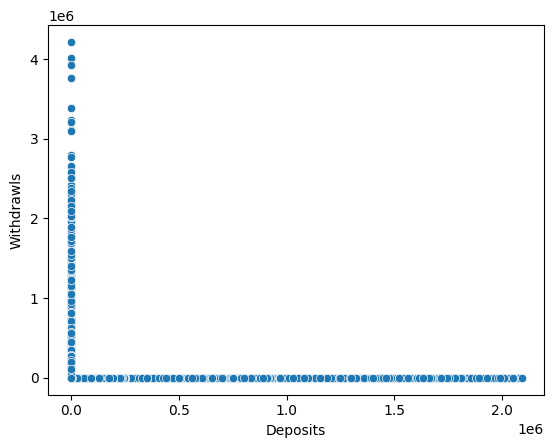

In [72]:
sns.scatterplot(data= df, x='Deposits', y='Withdrawls')
plt.show()

### Evidentemente, para revisar el comportamiento de los valores de estas columnas, es preferible reservar el una serie con los valores superiores a '0'. Eliminar estos valores de por sí, no es recomendable, ya que puede verse alterada los valores de la columna de los balances. 

In [73]:
Deposit = df['Deposits'][df['Deposits']>0]
Withdrawls = df['Withdrawls'][df['Withdrawls']>0]

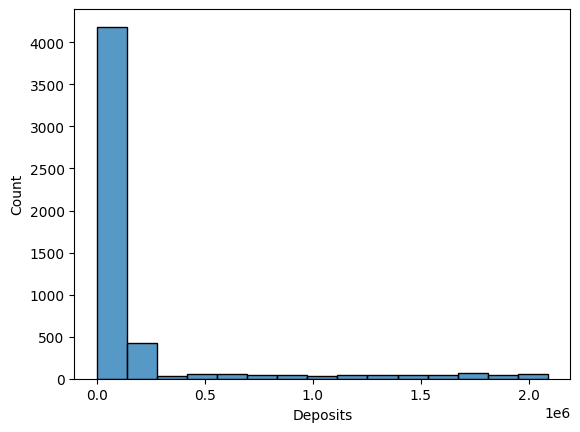

In [74]:
sns.histplot(Deposit, bins= 15)
plt.show()


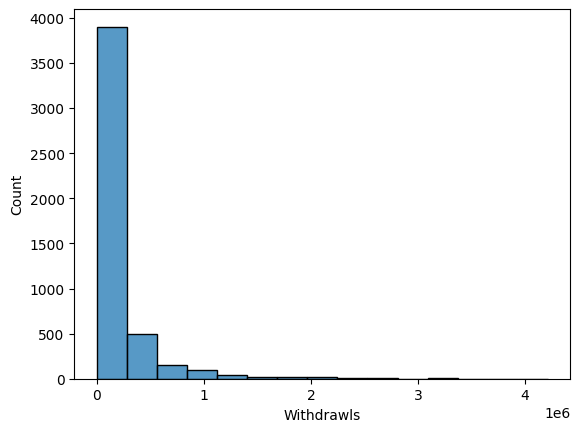

In [75]:
sns.histplot(Withdrawls, bins=15)
plt.show()

<Axes: xlabel='Balance', ylabel='Count'>

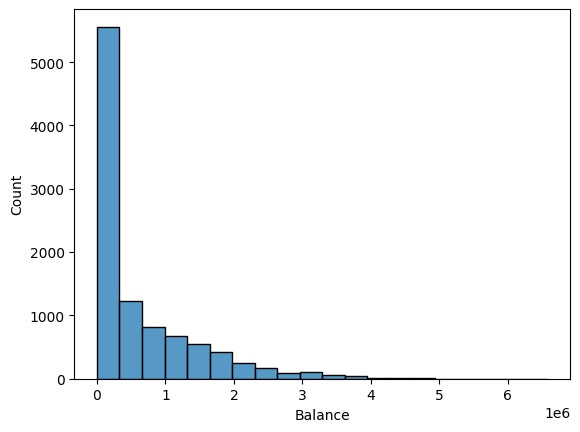

In [76]:
sns.histplot(data= df, x = 'Balance', bins=20)

### Ahora se observará el comportamiento de los valores de doposito y retiro, con relación al balance. 

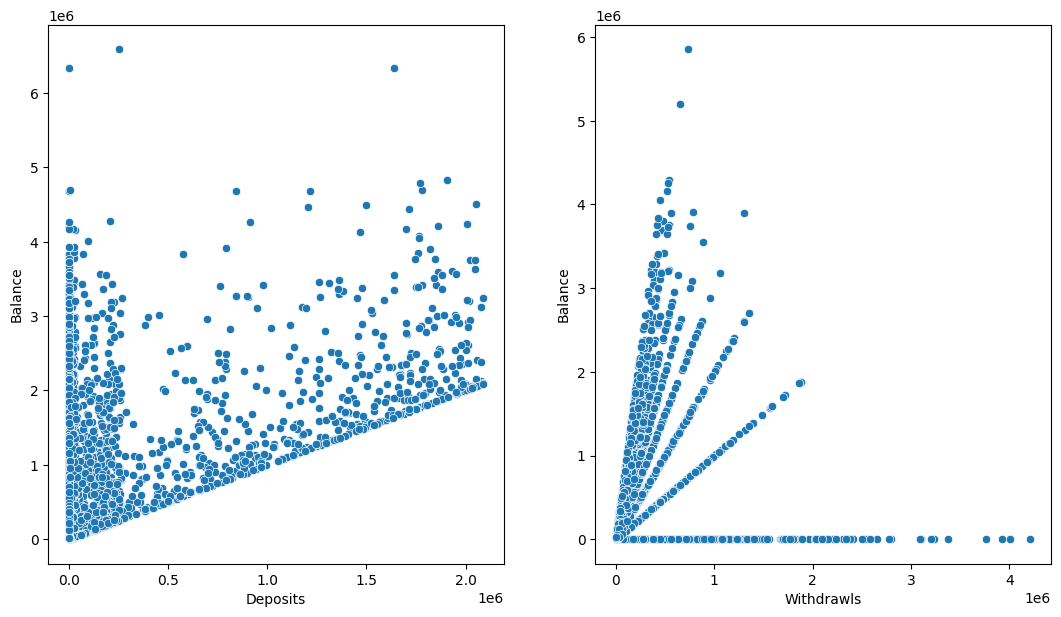

In [77]:
#El comportamiento de los valores en una matriz de comparación.
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.scatterplot(x=Deposit, y = df['Balance'], ax=ax1)
sns.scatterplot(x=Withdrawls, y = df['Balance'], ax=ax2)
plt.show()

### Luego de analizar estas realciones, resulta lógico, que con cada valor de depósito el Balance nunca está en 0, a diferencia de los retiros, resulta obvio, pero de no ser así, habría un error en la data. Ahora bién, evaluemos los valores anormales dentro de los datos, con los gráficos de caja.

### Verificación de los valores outliers

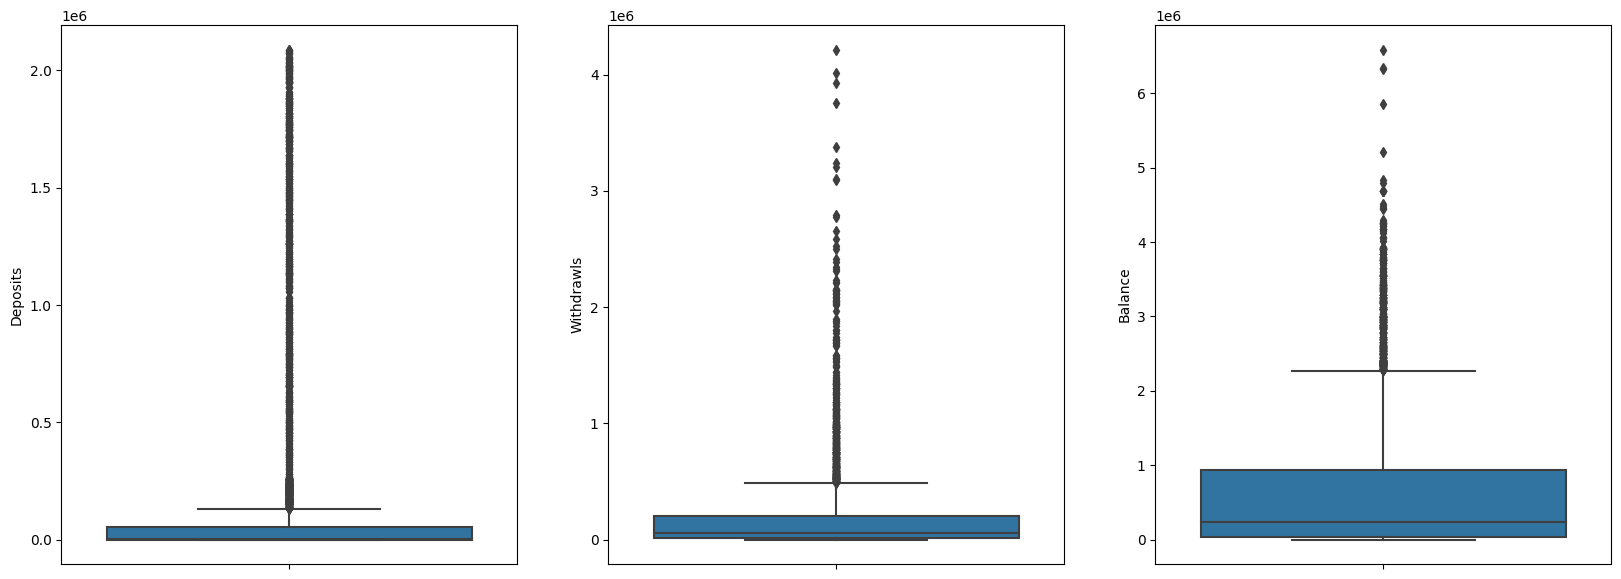

In [78]:
#Con los gráficos de cajas podemos ver evaluar la concentración delos datos
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.boxplot(y=Deposit, ax=ax1);
sns.boxplot(y=Withdrawls, ax=ax2);
sns.boxplot(data= df, y = 'Balance', ax=ax3);

### En la columna 'Description' se representa el proceso por el cuál se han realizado los movimientos que modifican el balance de una cuenta bancaria. Veamos la distribución de las cantidades de estas operaciones.

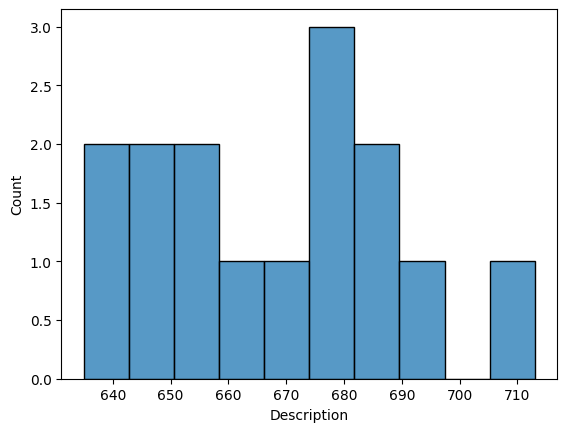

In [79]:
 # Mostrar la cantidad de valores de la columna 'Description'.
describ = df['Description'].value_counts()
sns.histplot(describ, bins=10)
plt.show()

### Ahora bien, en el siguiente paso corresponde verificar el comportamiento de estas columnas con respecto al tiempo.

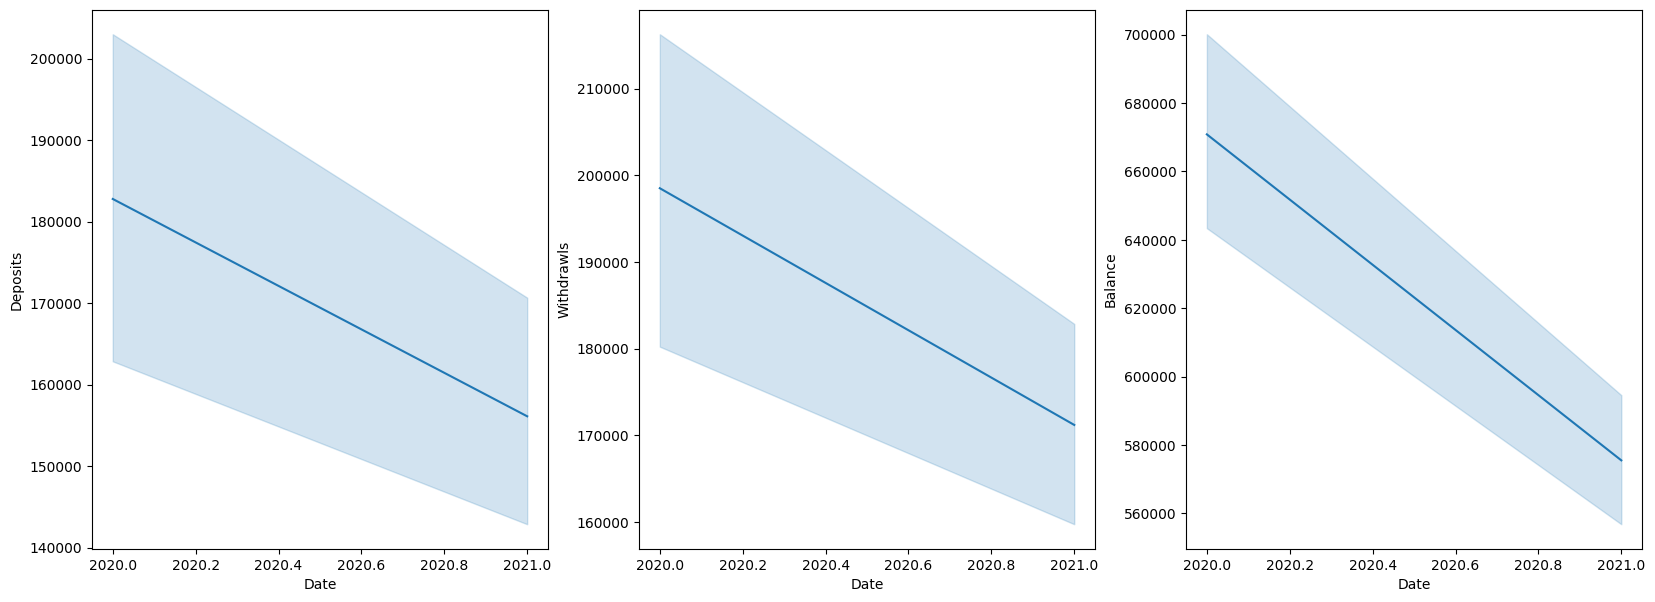

In [80]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.lineplot(x=df['Date'].dt.year, y=Deposit, ax=ax1)
sns.lineplot(x=df['Date'].dt.year, y=Withdrawls, ax=ax2)
sns.lineplot(x=df['Date'].dt.year, y=df['Balance'], ax=ax3)
plt.show()

### Parece ser que que es una tendencia marcada en el tiempo, la reducción en los montos máximos tanto en las operaciones de deposito, retiro y balance en general. Ahora observemos la a nivel global con que capital quedó el banco cuando se restan los reiros de los depósitos. 

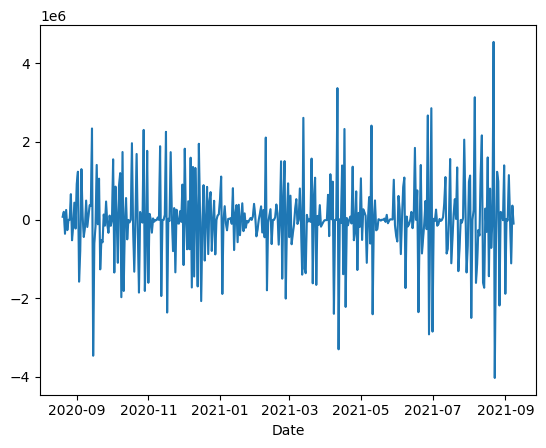

In [81]:
balance_total = df.groupby('Date')['Deposits'].transform('sum') - df.groupby('Date')['Withdrawls'].transform('sum')

sns.lineplot(x=df['Date'], y=balance_total)
plt.show()

### Ahora bien el comportamiento transitorio del balance entre final del año 2020, con el inicio de 2021, es bastante significativo. Ahora observemos que las operaciones por descripción que generó mayor volumen de dinero.

C:\Users\MariVi\AppData\Local\Temp\ipykernel_7172\1732545124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_suma = df.groupby('Description').sum().reset_index()


  Description     Deposits   Withdrawls       Balance
0         ATM  72425730.00  54149587.33  4.100834e+08
1        Bill  56967119.26  54601165.97  4.042947e+08
2        Cash  63558355.09  63277899.80  4.191708e+08
3      Cheque  43044937.67  53537574.84  4.239556e+08
4  Commission  53907164.15  60980048.94  4.505468e+08


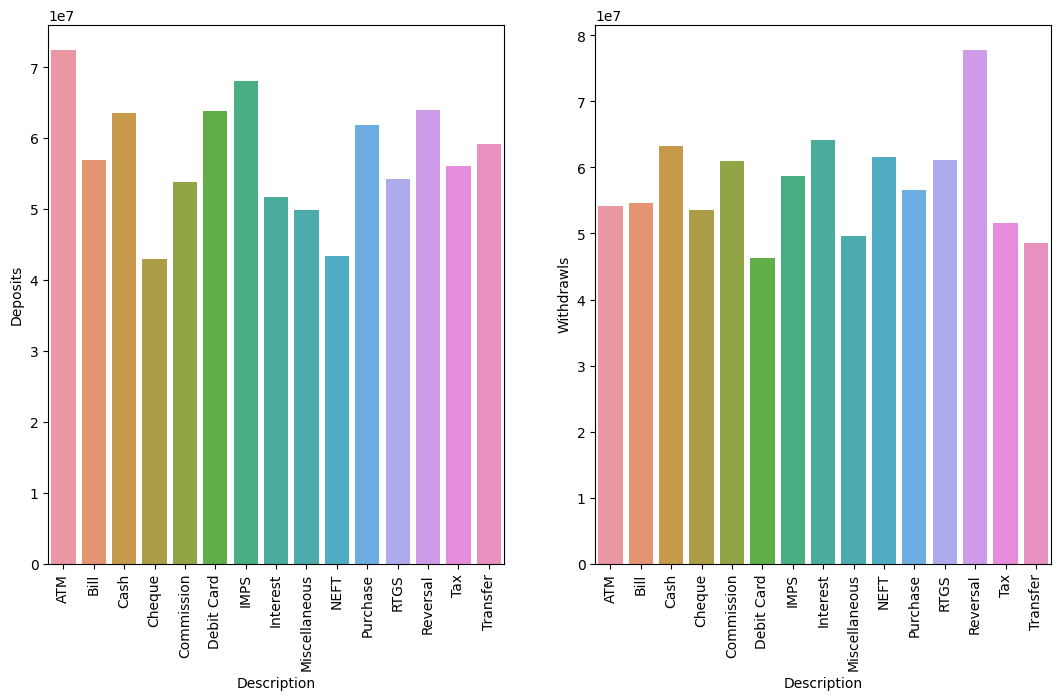

In [82]:
df_suma = df.groupby('Description').sum().reset_index()

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.barplot(data=df_suma, x='Description', y='Deposits', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=df_suma, x='Description', y='Withdrawls', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

## Conclusiones
### Del estudio de esta muestra de datos se pueden extraer multiples conclusiones, sin embargo en este caso las principales radican en observar que entre los años 2020 y 2021 el monto de las transacciones, ha disminuido. 
### La mayor cantidad de dinero que ingresó al banco fue através de los *Cajeros Automáticos*.
### La mayor cantiddad de Retiros se debe a las *Devoluciones*.
### El volumen de dinero ingresado mediante *Cheque* es menos en comparación a los otros sistemas.
### El uso de las *tarjetas de debito* representa un porsentaje menor en cuanto a los retiros de la cuenta, en relación a los otros sistemas.

In [83]:
df.to_csv('RegistroBanco.csv', index=False)